<a href="https://colab.research.google.com/github/JosenildoJunior/Internet_service_churn/blob/main/Internet_service_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Como identificar e prever clientes com riscos de cancelar o nosso serviço ?**

*Através desse projeto você pode ter uma possível resolução para o seu problema!*

##*Esse projeto tem como objetivos identificar perfis e prever clientes com risco de churn.*

Para a resolução dessa problemática o projeto foi dividido nas seguintes etapas:

* 1.   *Entendimento do problema*
* 2.   *Obtenção dos dados*
* 3.   *Analise exploratória e Visualização dos dados*
* 4.   *Pré-Processamento*
* 5.   *Modelos de Machine Learning e Avaliação do modelo*





# **1. Entendimento do problema**

*Existe uma grande competição entre os provedores de Internet. Se um provedor deseja aumentar sua receita, ele precisa de mais assinantes, mas manter o cliente existente é mais importante do que ter novos. Assim, os provedores querem saber qual cliente deve cancelar seu serviço. Portanto o objetivo desse projeto é conseguir identificar perfis e prever.*

# **2.** **Obtenção dos dados**




Os dados foram extraídos do kaggle e são de uma base de clientes de um provedor de internet. Utilizei o Google Colab para fazer as análises.


**Permitindo o acesso do Google Colab ao Drive**

  Esse passo é necessário para que seja possivel importar dados diretamente do drive

In [1]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importando as bibliotecas**

**Para fazer as analises é necessario importar algumas bibliotecas previamente, nesse caso estou importando o pandas para manipulação de dados e o seaborn para visualização dos dados.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importação dos dados e criando uma copia do dataset para ser usado futuramente.**

In [3]:
#Fonte: https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn
dados = pd.read_csv('/content/drive/MyDrive/Dados/internet_service_churn.csv')

# Criando uma copia dos dados
dados_c = dados.copy()

# Visualizando as 10 primeiras linhas
dados.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


*No conjunto de dados temos as seguinte variáveis:*

*   id: ID de assinante exclusivo

*   is_tv_subscriber: Ciente tem uma assinatura de tv?

*   is_movie_package_subscriber: ele/ela tem um pacote de filme sinema subs

*   subscription_age: há quantos anos o cliente usa nosso serviço

*   bill_avg: fatura média dos últimos 3 meses

*   reamining_contract: quantos anos faltam para o contrato do cliente. se nulo; cliente não tem contrato.

*   service_failure_count: contagem de chamadas do cliente para o call center por falha de serviço nos últimos 3 meses

*   download_avg: últimos 3 meses de uso da internet (GB)

*   upload_avg: média de upload dos últimos 3 meses (GB)

*   download_over_limit: a maioria dos clientes tem um limite de download. se eles atingirem esse limite, eles terão que pagar por isso.

*   churn: cliente deixou de ser cliente do provedor ou não (Churn = 1).






# **3. Analise exploratória dos dados**





**Objetivos**: 

* Identificar o tipo de cada variável (numérica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar o perfil dos clientes que deram Churn

**Identificando as variáveis presentes no dataset**

In [ ]:
# Visão geral dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [ ]:
# Observando as dimensões dos dados
dados.shape

(72274, 11)

É possível observar que esse dataset tem 72274 entradas e 11 colunas.

Os dados se enquadram em duas categorias:

* **Variáveis categóricas**: is_tv_subscriber, is_movie_package_subscriber e churn.

* **Variáveis numéricas**: subscription_age, bill_avg, reamining_contract, service_failure_count, download_avg, upload_avg e download_over_limit.

**Identificando a variável alvo:**

O objetivo é identificar o perfil de clientes que cancelaram o serviço com o provedor e tentar prever clientes em risco de Churn. Assim a variável **'churn'** é a variável adequada para alcançar os objetivos propostos.

In [ ]:
dados.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Os clientes desse provedor tem em média de dois anos e meio de contrato, sendo que os clientes mais antigos tem 12 anos e os mais novos tem por volta de 2 meses de contrato.

Observando a variável 'churn' é possível observar que em média 55% dos clientes cancelaram seu contrato com o provedor.

**Observando a distribuição das variáveis**

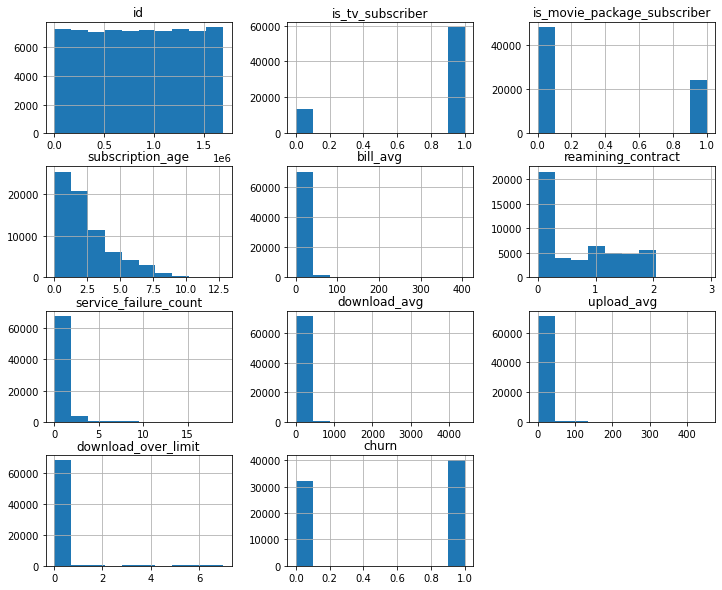

In [ ]:
# Criando um gráfico com todas as colunas do dataset
dados.hist(figsize=(12,10));

* Na variável 'bill_avg' a maioria dos dados está entre 0 e 100, o mesmo se aplica a variável 'upload_avg', enquanto no 'download_avg' a maioria dos dados estão distribuídos entre 0 e 1000.

* Já no 'Service_failure_count' a distribuição fica entre 0 e 4, enquanto no 'dowload_over_limit' a maioria esta entre 0 e 1.

* Pode-se observar uma distribuição assimetria à esquerda na variável 'subscription_age', ou seja, a maioria dos clientes tem entre 0 a 2 anos e meio de contrato e poucos clientes tem contrato a mais de 7 anos e meio

**Observando os dados de maneira geral**

Para essa observação irei usar uma biblioteca chamada SweetViz que vai fazer entregar uma visão geral dos dados, com base na nossa variável alvo, a 'churn'.

É possível gerar um html com esse pacote, porém vou optar por analisar no próprio notebook.

In [ ]:
# Instalando e importando o SweetViz
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 48.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


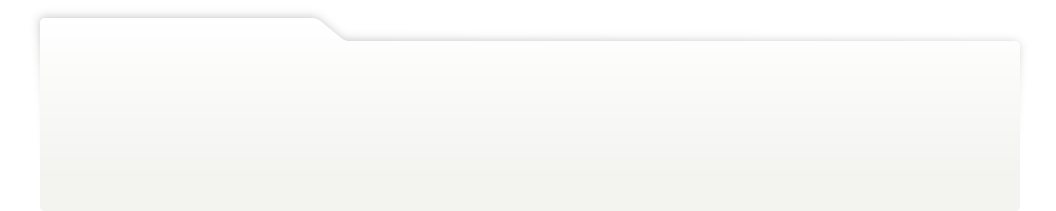
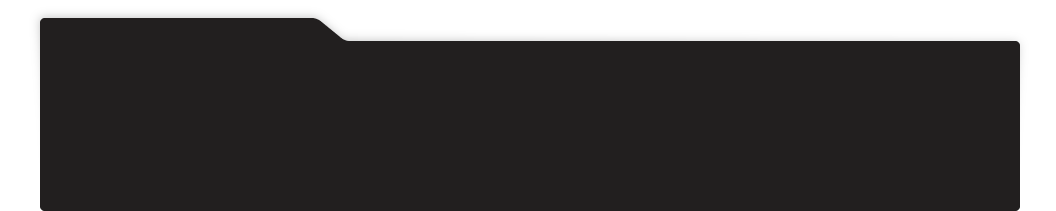
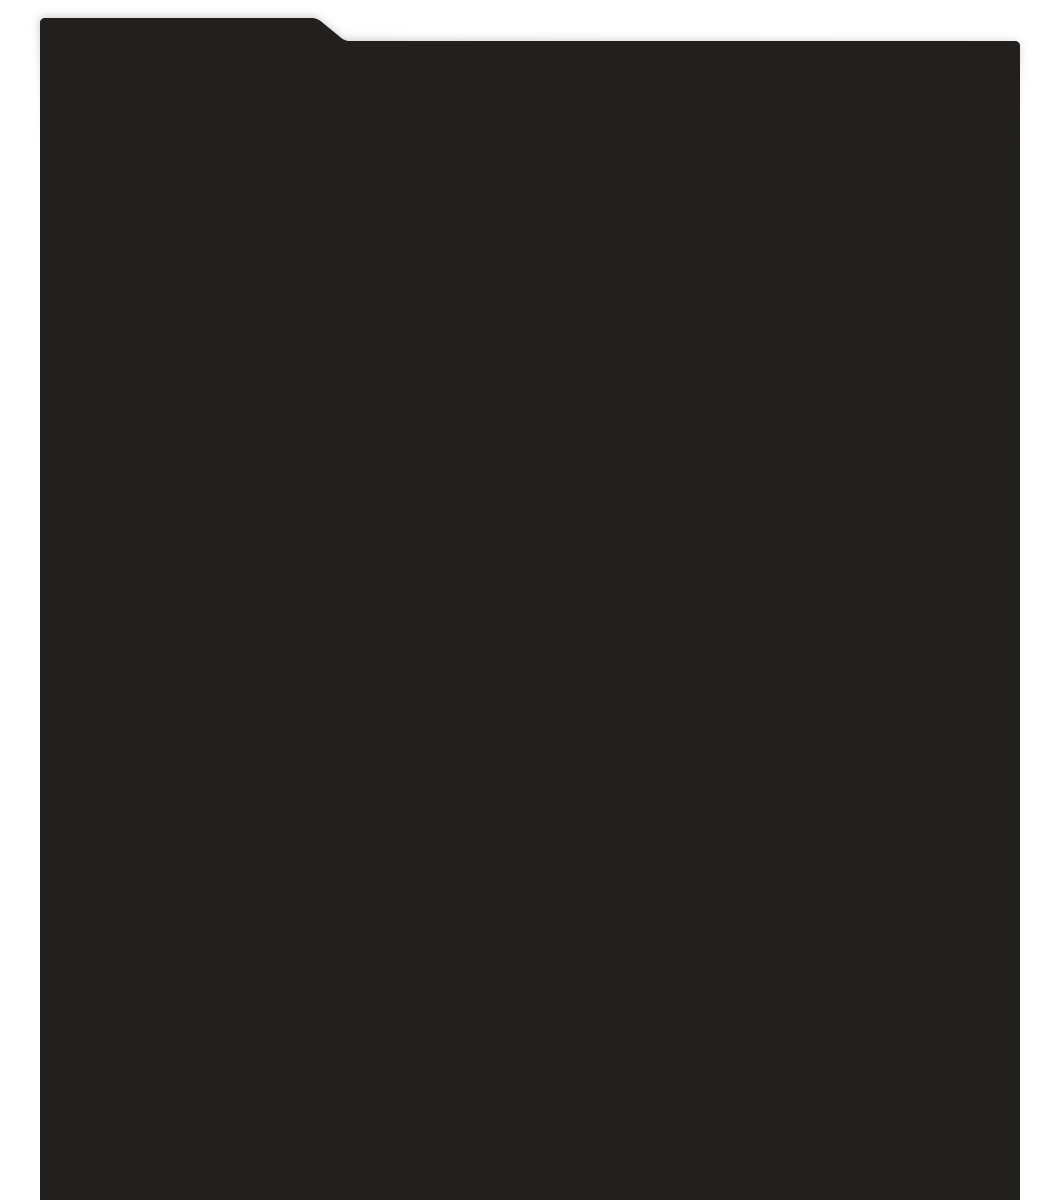
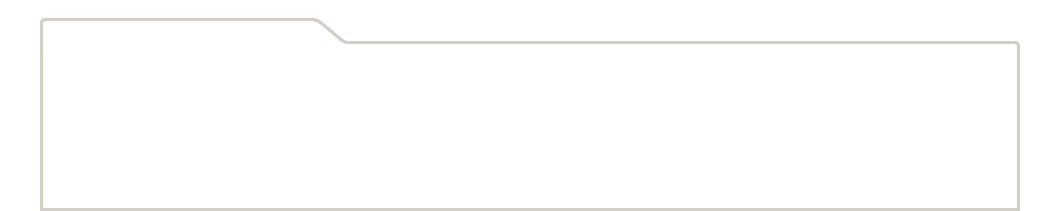
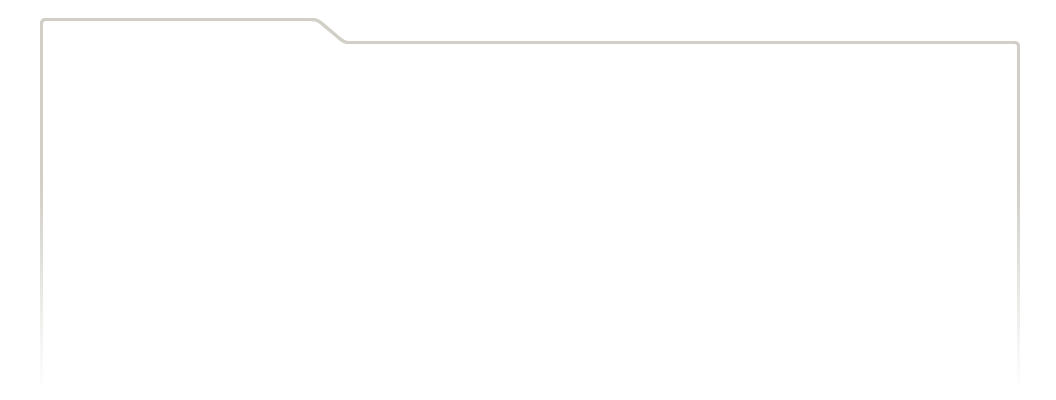
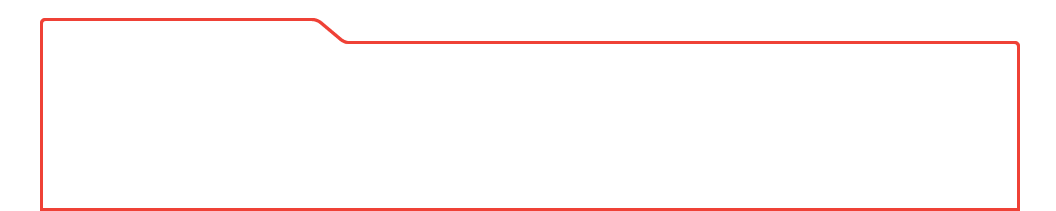
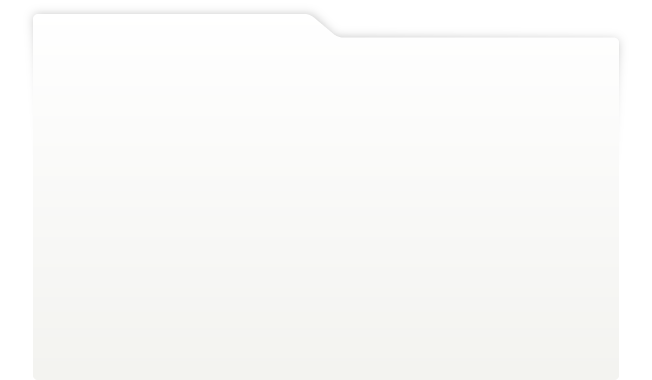
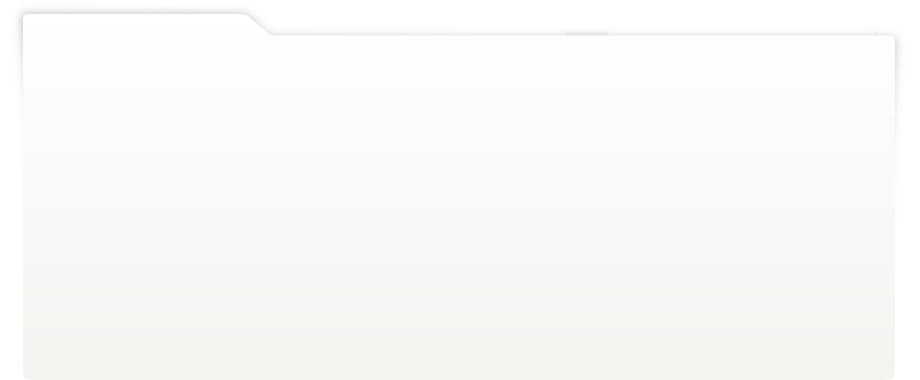
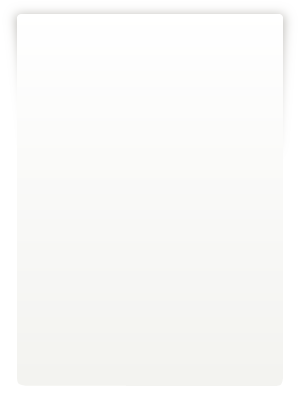
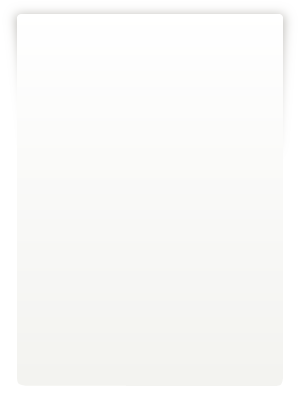
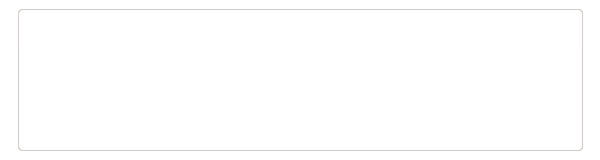
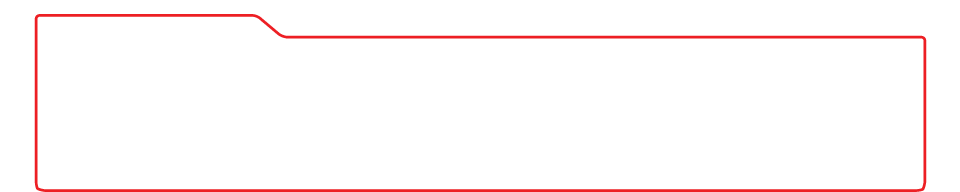
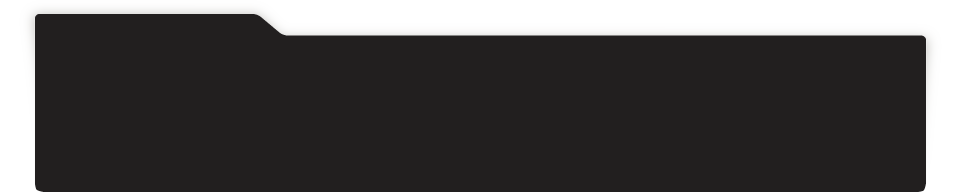
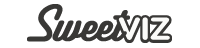
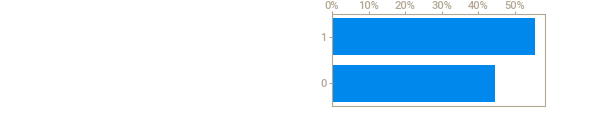
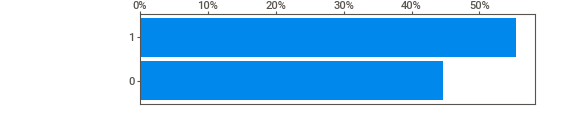
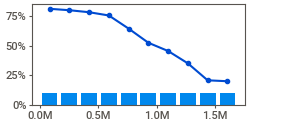
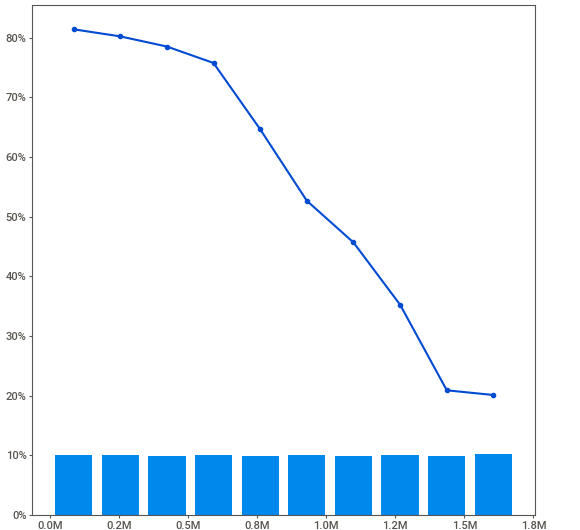
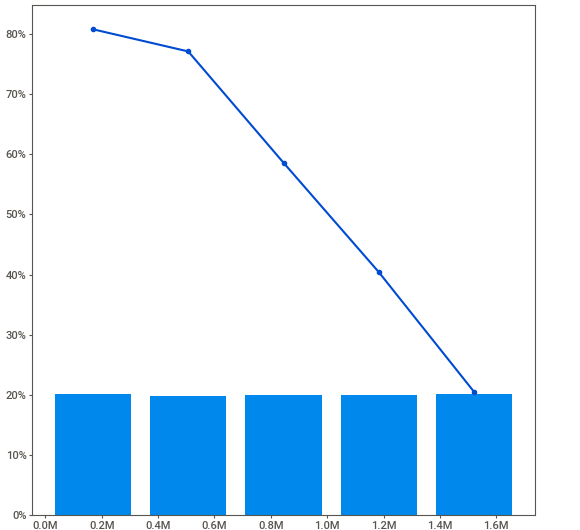
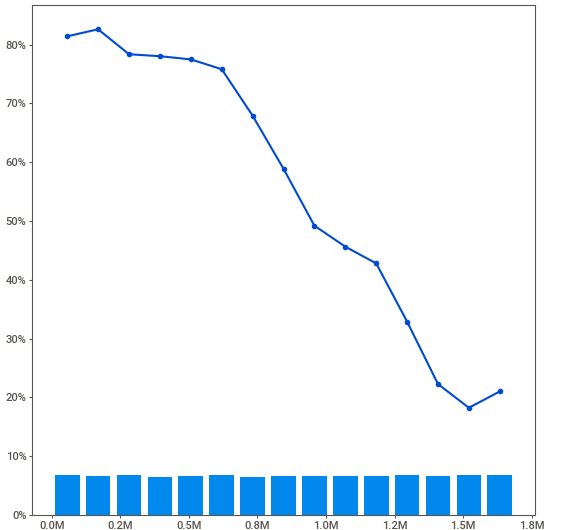
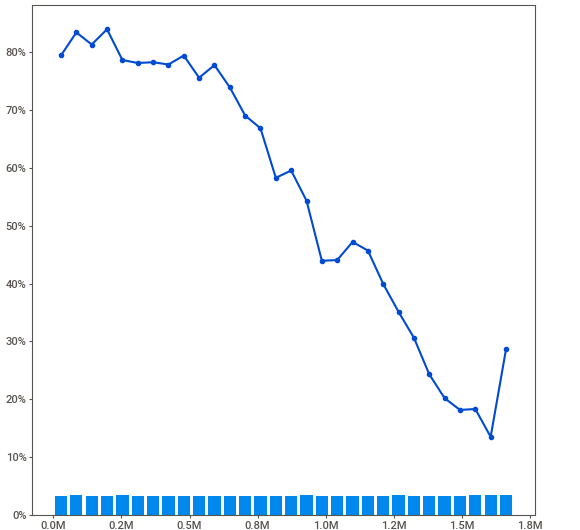
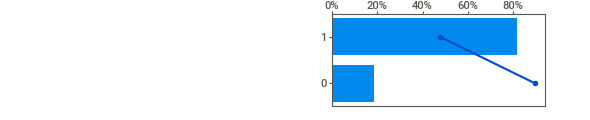
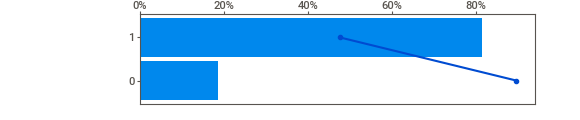
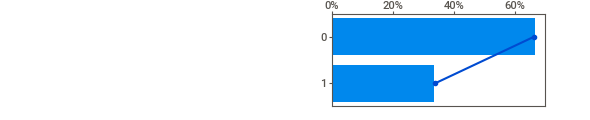
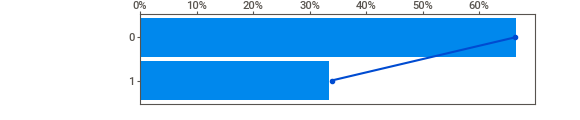
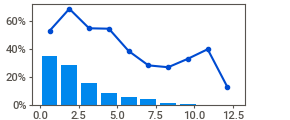
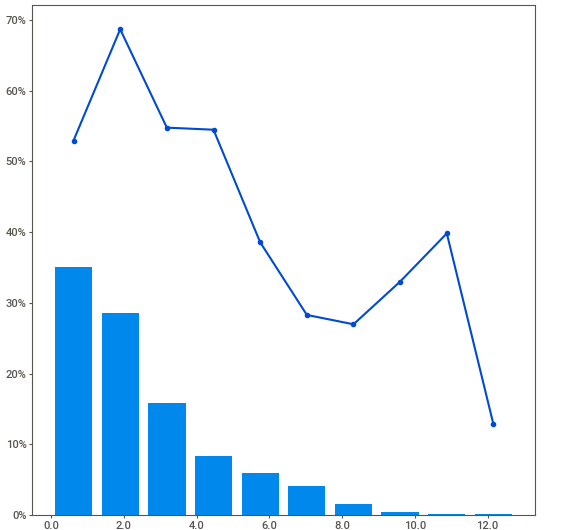
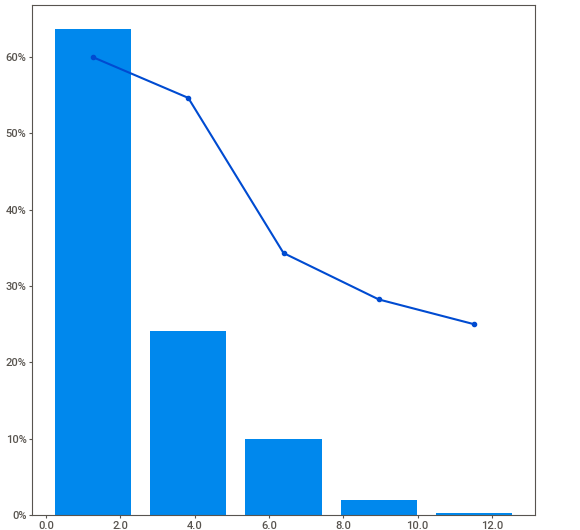
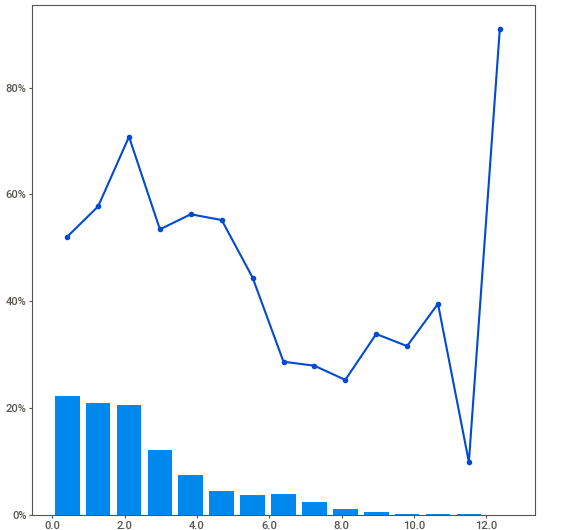
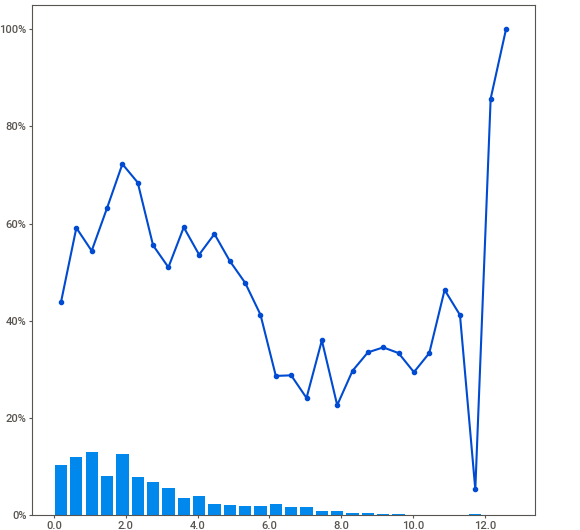
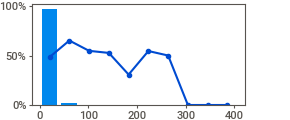
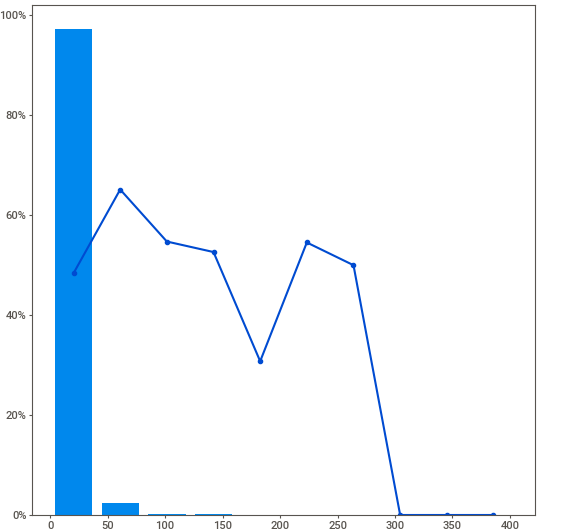
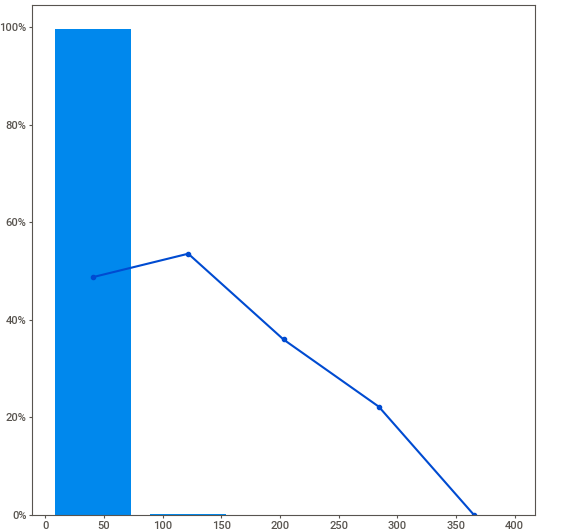
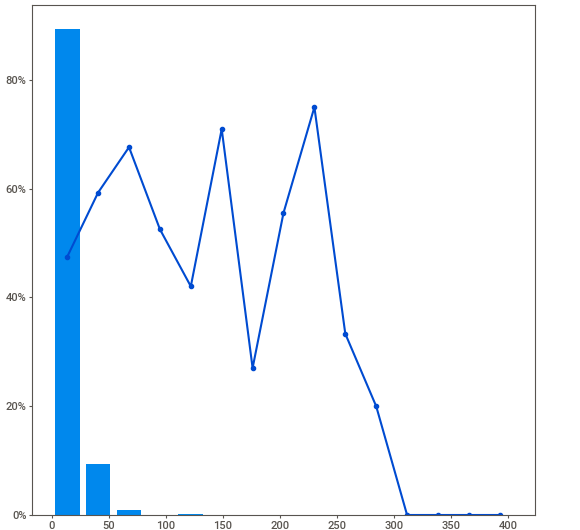
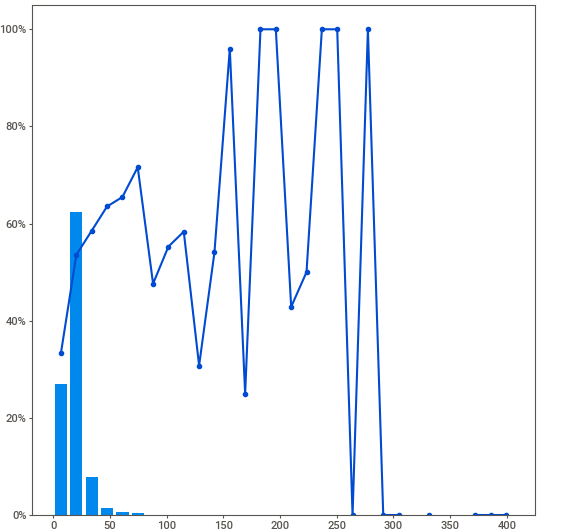
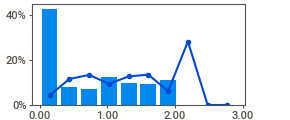
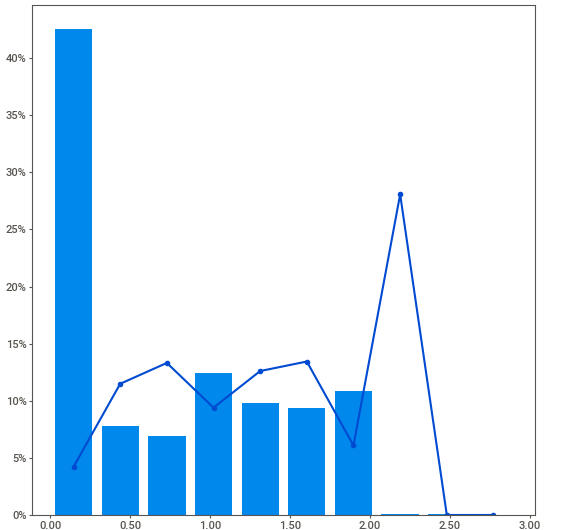
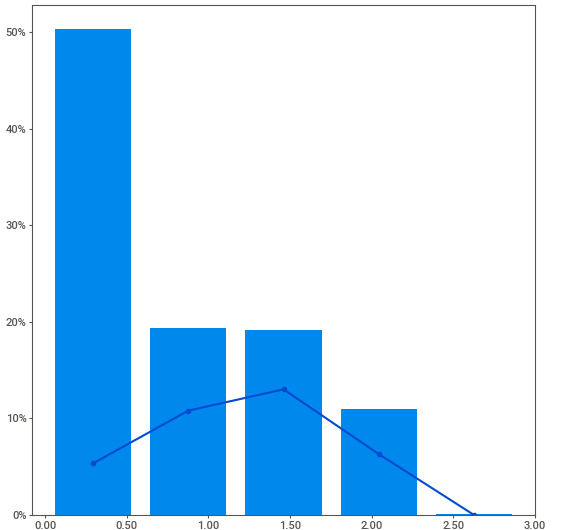
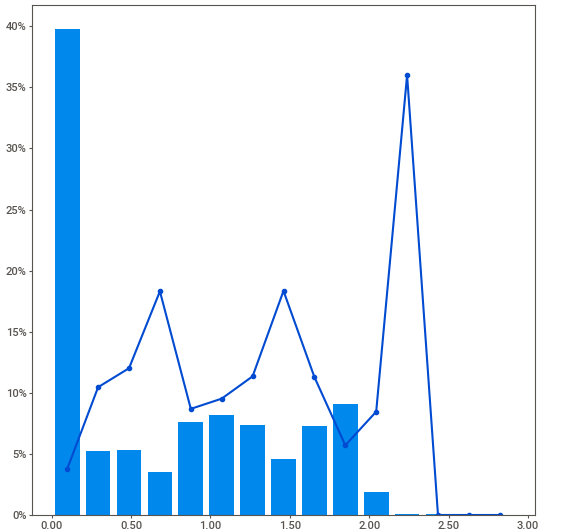
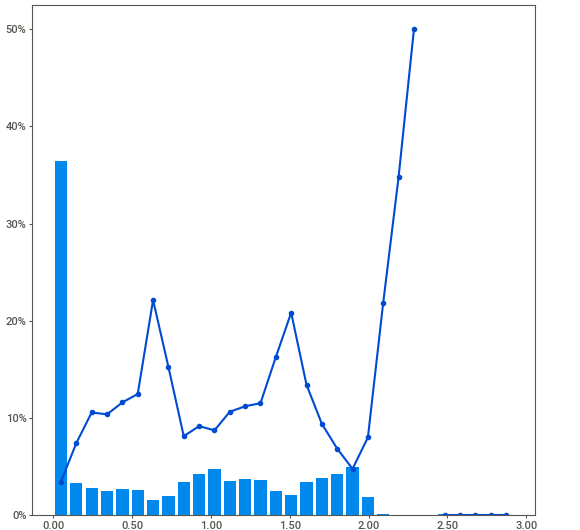
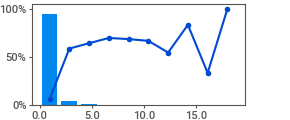
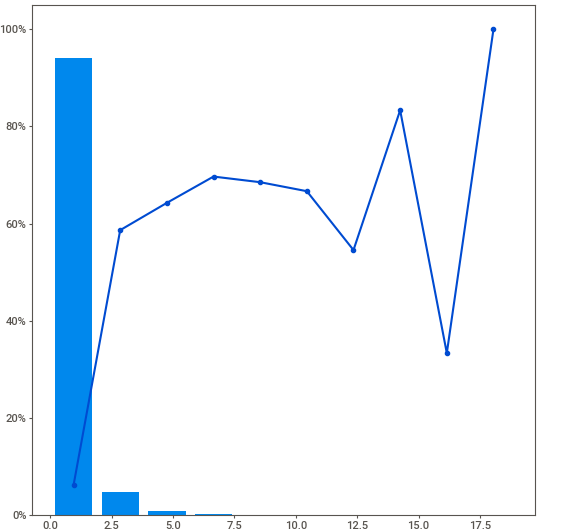
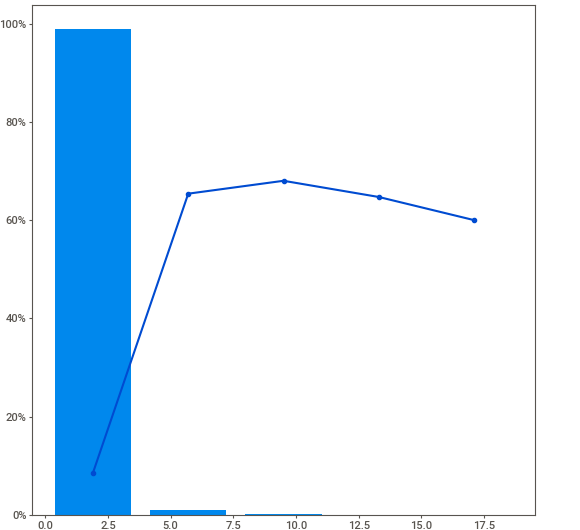
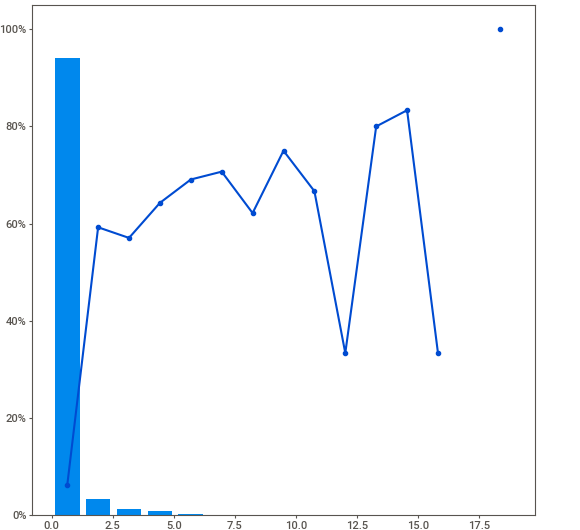
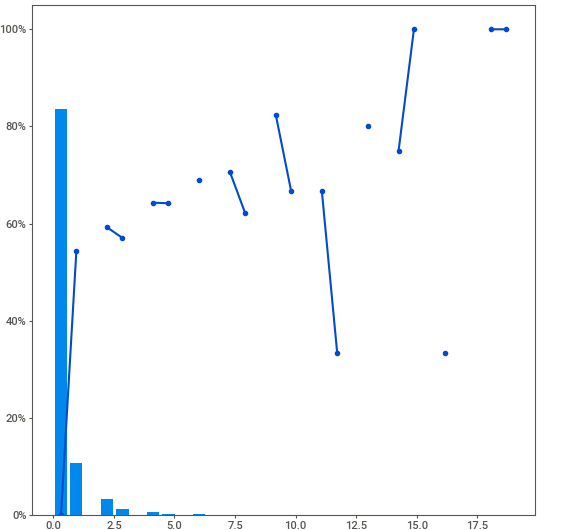
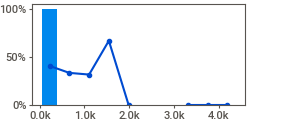
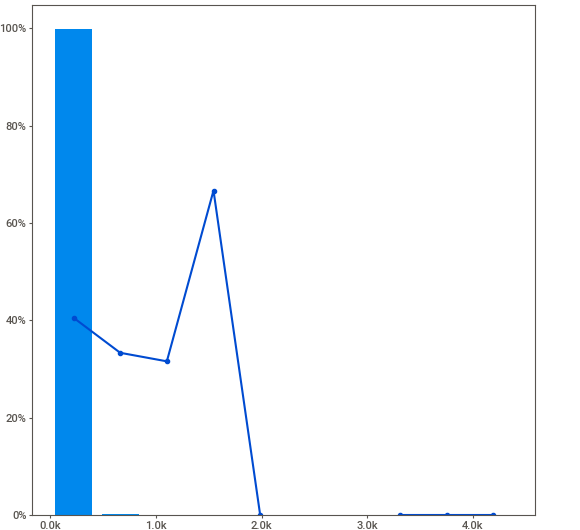
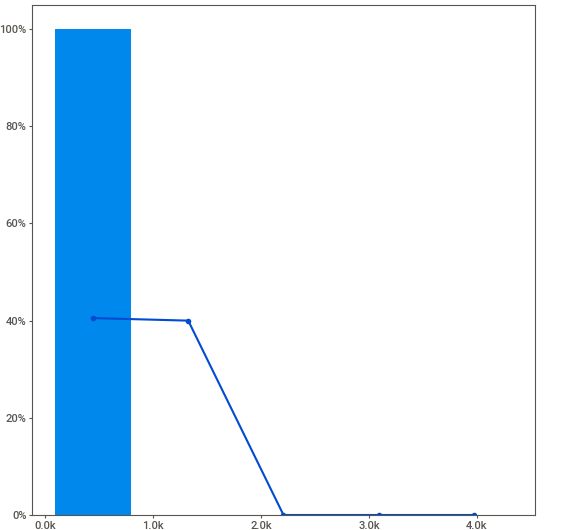
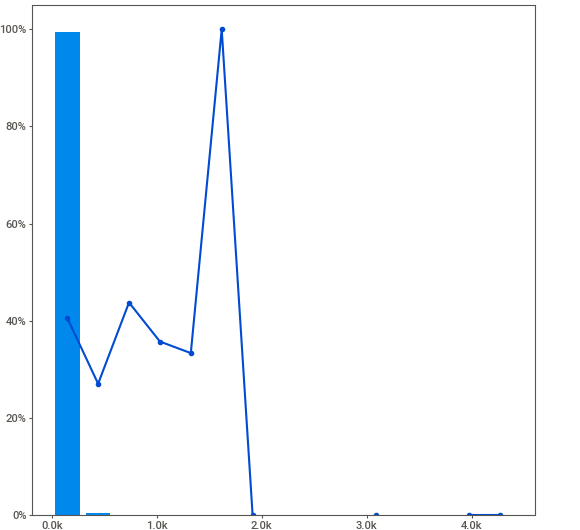
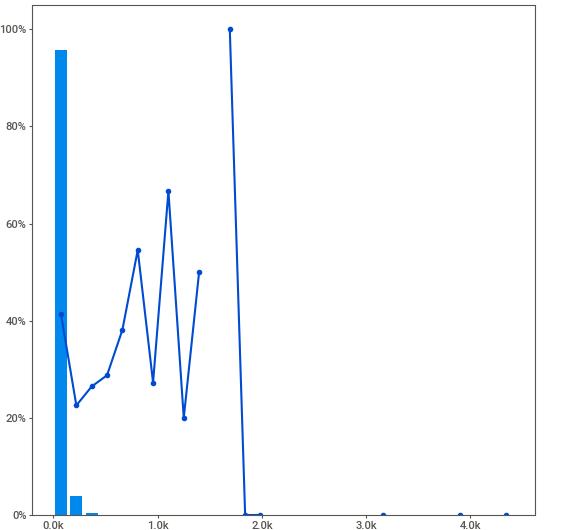
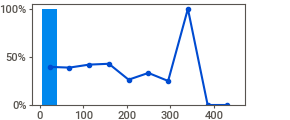
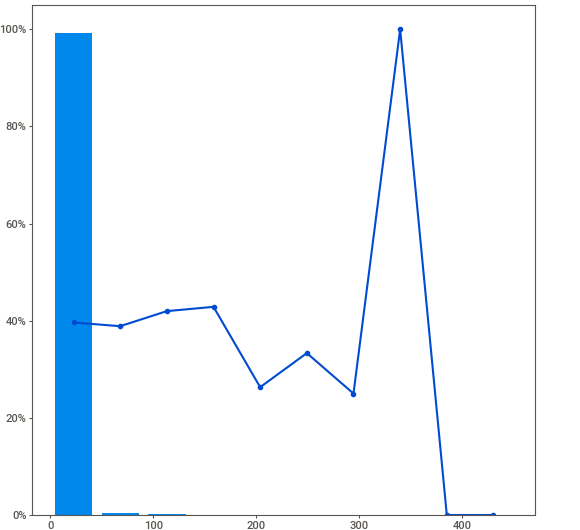
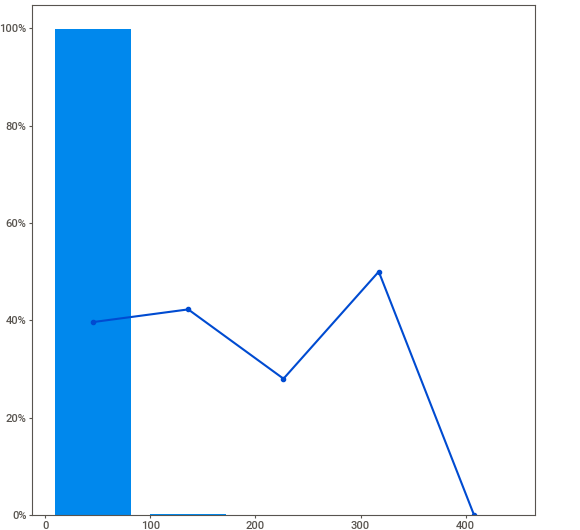
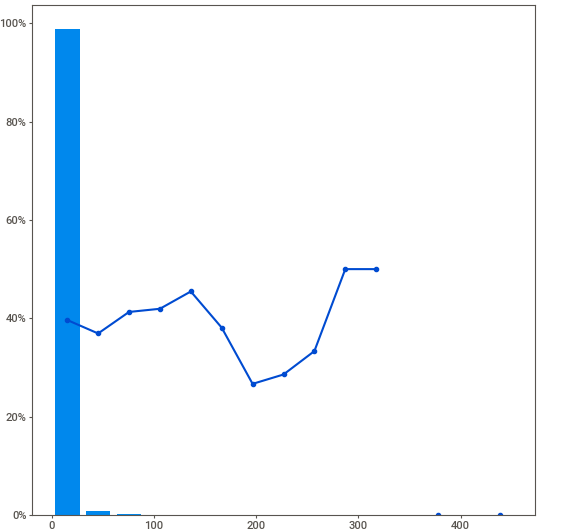
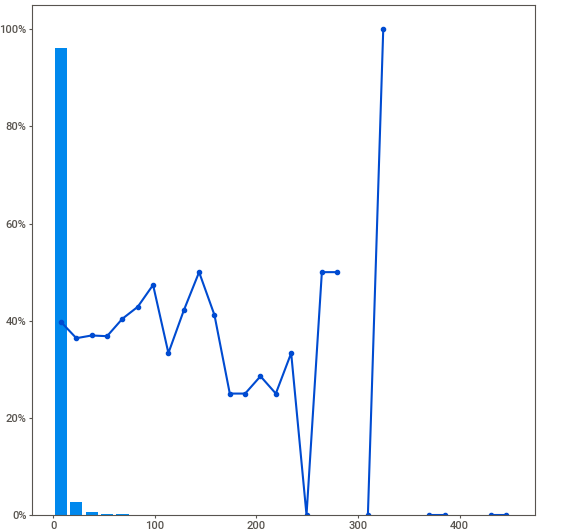
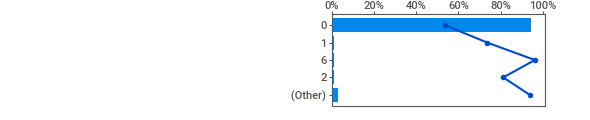
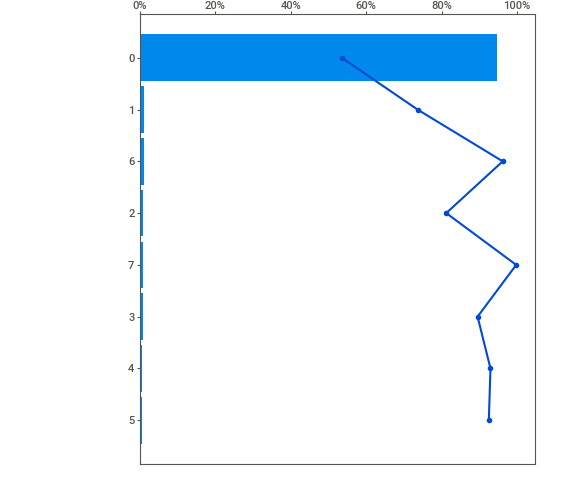
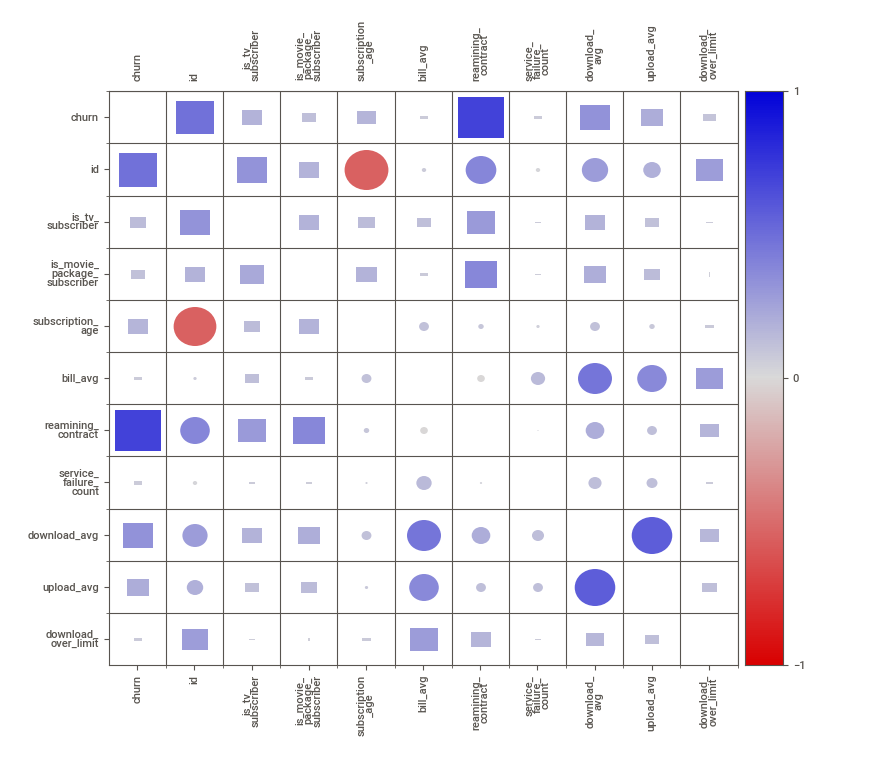
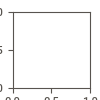

In [ ]:
# Observando os dados
dash = sv.analyze(dados, target_feat= 'churn')
dash.show_notebook()

**Anotações pertinentes a análise**

* 55% dos clientes cancelaram seus contratos

* Metade dos clientes, com alguma assinatura de TV cancelaram o contrato e 90% das pessoas que não tem assinatura de TV acabam cancelando o contrato.

* 66% das pessoas que não tem pacotes de filmes acabam cancelando o contrato enquanto e 34% das pessoas, com algum pacote de filme, também cancelam o contrato.

* Após os 3 primeiros anos de contrato a tendência dos cancelamentos é diminuir.

* A maior parte dos cancelamentos são feitos após finalizar os contratos, embora alguns tenham cancelado mesmo faltando algum tempo a maior parte dos cancelamentos são feitos enquanto resta 1 anos ou menos de contrato.

* A maior parte dos cancelamentos estão concentrados em faturas 'bill_avg' que variam de aproximadamente 15 a 50.

* A partir da 2ª abertura de chamados para suporte a tendência de cancelamento aumenta consideravelmente.

* As variaveis 'download_avg' e 'upload_avg' não parecem influenciar tanto nos churn

* Observando a variável 'download_over_limit' é possível destacar que 95% clientes não ultrapassaram o limite de download e mesmo assim 54% desses clientes cancelaram, o contrato.
A partir do momento que o cliente ultrapassa o limite estabelecido a taxa de cancelamento aumenta consideravelmente, 74% dos clientes que ultrapassaram 1 GB do seu limite cancelaram o contrato, 81% dos clientes que ultrapassaram em 2GB também reincidiram seus contratos.
Quando os clientes chegam a 3GB ultrapassados a taxa de cancelamento é de 90% em diante, chegando a incríveis 99% de cancelamentos quando é ultrapassado 7GB, do limite estabelecido.




**Criando um dataset apenas com as variaveis númericas.**
O objetivo da criação desse novo dataset é a observação da correlação entre as variaveisa a partir de uma matriz de correlação.

In [ ]:
# Criando um dataset apenas com as variaveis númericas e acrescentando a variavel churn para observar a correlação entre as outras
df_num = dados[['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg','download_over_limit', 'churn']]
df_num

,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,11.95,25,0.14,0,8.4,2.3,0,0
1,8.22,0,NaN,0,0.0,0.0,0,1
2,8.91,16,0.00,0,13.7,0.9,0,1
3,6.87,21,NaN,1,0.0,0.0,0,1
4,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...
72269,0.09,0,1.25,0,0.0,0.0,0,1
72270,0.06,1,1.63,0,0.8,0.0,0,1
72271,0.02,0,2.19,0,1.5,0.2,0,1
72272,0.01,0,0.72,0,0.0,0.0,0,1


**Criando a matriz**

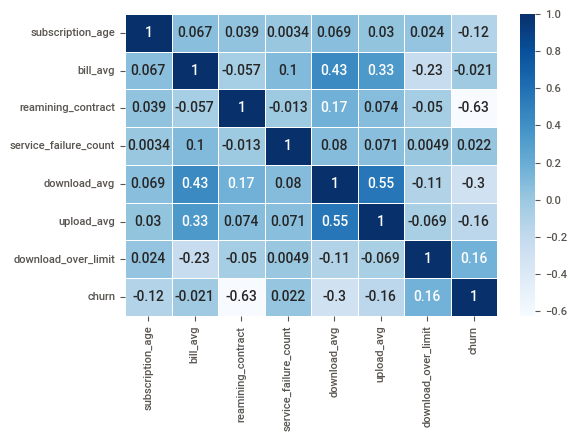

In [ ]:
# Criando a matriz
sns.heatmap(df_num.corr(),annot = True, cmap='Blues',linewidth=.5);

* Observando as correlações entre as variáveis, é possível concluir que a maior correlação que temos é entre a variável 'upload_avg' e 'download_avg', por se tratar de uma correlação positiva isso implica dizer que ambas as variáveis tendem a aumentar juntas.

* A variável 'bill_avg' tem correlação tanto com a 'upload_avg', quanto com 'download_avg', ambas são correlações positivas, a mais forte com a 'download_avg', conclui-se então que quanto maiores são os downloads e uploads maior vai ser o valor da fatura.

* Existe uma correlação negativa entre o tempo restante do contrato 'reamining_contract' e a variável 'churn', aparentemente quanto menor o tempo restante de contrato maior o churn. O mesmo se aplica a média de download 'download_avg', quanto menor ela é maior o churn.

##**Conclusão**

Observa-se que um cliente quando não tem nenhuma assinatura de TV, não tem nenhum pacote de filmes, esta nos três primeiros anos de contrato, com pouco tempo para seu contrato ser finalizado, com duas ou mais chamadas de suporte em seu histórico e que já tenham ultrapassado o limite de download em mais de 1GB tem uma taxa de churn maior que os outros clientes. 



# **4.** **Pré-Processamento**

**Objetivos:**

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados ausentes;
* Remoção de Outliers;
* Escala das Variáveis;


## **A. Eliminando variavies que não serão utilizadas.**

*Nesse caso não sera necessário a exclusão de nenhuma variável.*

## **B. Tratando dados ausentes**



*Verificando quais as variáveis que tem dados faltantes.*

In [4]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns, 
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False) 

soma_ausentes(dados)

,Variavéis,Soma de ausentes
5,reamining_contract,21572
7,download_avg,381
8,upload_avg,381
0,id,0
1,is_tv_subscriber,0
2,is_movie_package_subscriber,0
3,subscription_age,0
4,bill_avg,0
6,service_failure_count,0
9,download_over_limit,0


*Nota-se que 3 variáveis estão com alguns dados ausentes, sendo a maior dela a variável 'reamining_contract', seguidos por 'download_avg' e 'upload_avg'. Então é necessário um tratamento adequado para esses dados.*

**Verificando se existe outliers na variável reamining_contract**

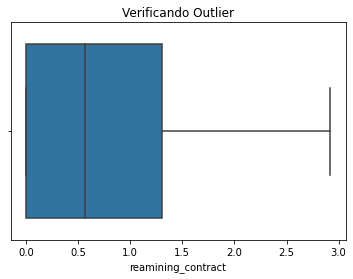

In [5]:
# Verificando possiveis outliers
sns.boxplot(x = dados['reamining_contract']).set_title('Verificando Outlier');

*Como não temos nenhum outlier presente nessa variável, podemos pegar a média dos dados e preencher os valores ausentes pela média*

In [6]:
# Pegando a media dos dados ausentes
f_reamining_contract = dados['reamining_contract'].mean()
f_reamining_contract

0.7160392094986392

*Aparentemente a média não está dão distante da mediana, isso significa que temos uma distribuição que beira uma distribuição assimétrica.*

**Preenchendo os valores ausente pela média.**

In [7]:
# Preenchendo os valores ausentes com a média
dados['reamining_contract'] = dados['reamining_contract'].fillna(f_reamining_contract).round(2)

**Observando as demais variáveis.**

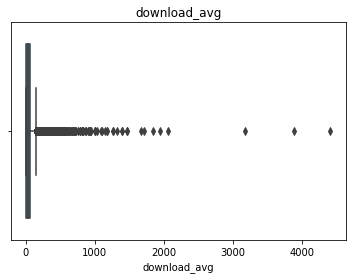

In [8]:
# Obsevando a distribuição dos dados
sns.boxplot(x = dados["download_avg"]).set_title('download_avg');

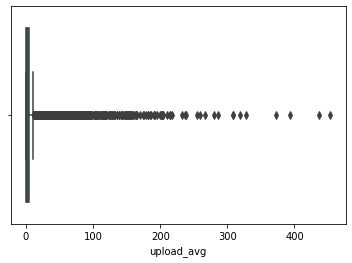

In [9]:
# Obsevando a distribuição dos dados
sns.boxplot(x = dados["upload_avg"]);

*É possível notar a presença de outliers em ambas as variáveis, nesse caso vou utilizar a mediana para preencher os dados ausentes por ser uma medida menos sensível a outliers diferente da média que acaba sendo bastante sensíveis em casos como esse.*

**Pegando apenas a mediana de 'download_avg'**

In [10]:
# Pegando a mediana de download_avg
f_download_avg = dados['download_avg'].median()
f_download_avg

27.8

**Preenchendo os valores ausentes pela mediana.**

In [11]:
dados['download_avg'] = dados['download_avg'].fillna(f_download_avg)

**Pegando apenas a mediana de 'download_avg'**

In [12]:
# Pegando a mediana de upload_avg
f_upload_avg = dados['upload_avg'].median()
f_upload_avg

2.1

**Preenchendo os valores ausentes pela mediana.**

In [13]:
dados['upload_avg'] = dados['upload_avg'].fillna(f_upload_avg)

In [14]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns, 
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False) 

soma_ausentes(dados)

,Variavéis,Soma de ausentes
0,id,0
1,is_tv_subscriber,0
2,is_movie_package_subscriber,0
3,subscription_age,0
4,bill_avg,0
5,reamining_contract,0
6,service_failure_count,0
7,download_avg,0
8,upload_avg,0
9,download_over_limit,0


**O tratamento de dados ausentes foi finalizado!**

## **C. Remoção de outliers**

*Nessa etapa será feito uma verificação e remoção dos outliers*

**Já foi observado que nas variáveis 'download_avg' e 'upload_avg' existem outliers então serão as primeiras a ser tratadas.** 

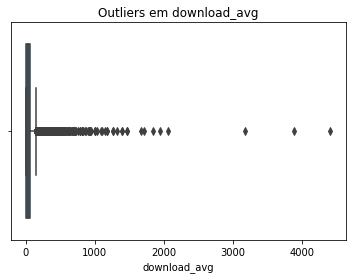

In [15]:
# Observando outliers em download_avg
sns.boxplot(x = dados['download_avg']).set_title("Outliers em download_avg");

Aqui pode-se confirmar a presença de diversos outliers, para resolver essa problemática primeiro vai ser pego o maior valor corresponde a 97,5% dos dados, dessa forma iremos excluir os 2,5% de dados restantes.

In [16]:
top_download_avg = dados['download_avg'].quantile(0.975)
top_download_avg

177.9

Agora que o maior valor correspondente a 97,5% dos dados está armazenado na variável 'top_download_avg' o próximo passo é fazer o tratamento propriamente dito.

In [17]:
dados.loc[dados['download_avg'] > top_download_avg, 'download_avg'] = top_download_avg

Se algum valor na variável download_avg, for maior que a variável top_download_avg esse valor vai ser substituído pelo valor da variável.

**Podemos observar uma redução considerável nos outliers.**

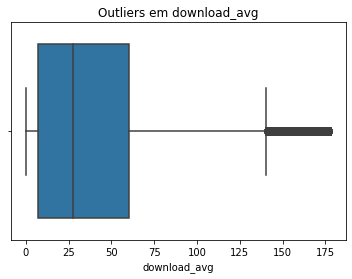

In [18]:
# Confirmando outliers em download_avg
sns.boxplot(x = dados['download_avg']).set_title("Outliers em download_avg");

**Observando possíveis outliers na variável 'upload_avg'**

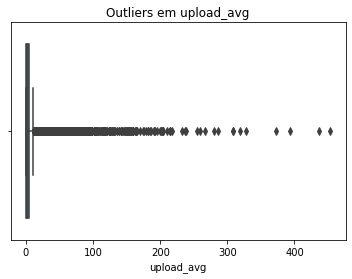

In [19]:
# Observando outliers em download_avg
sns.boxplot(x = dados['upload_avg']).set_title("Outliers em upload_avg");

Aqui pode-se confirmar a presença de diversos outliers, para solucionar essa problemática primeiro vai ser pego o maior valor corresponde a 97,5% dos dados, dessa forma iremos excluir os 2,5% de dados restantes.

In [20]:
top_upload_avg = dados['upload_avg'].quantile(0.975)
top_upload_avg

19.2

Agora que o maior valor correspondente a 97,5% dos dados está armazenado na variável 'top_upload_avg' o próximo passo é fazer o tratamento propriamente dito.

In [21]:
dados.loc[dados['upload_avg'] > top_upload_avg, 'upload_avg'] = top_upload_avg

Se algum valor na variável download_avg, for maior que a variável top_download_avg esse valor vai ser substituído pelo valor da variável.

**Podemos observar uma redução considerável nos outliers.**

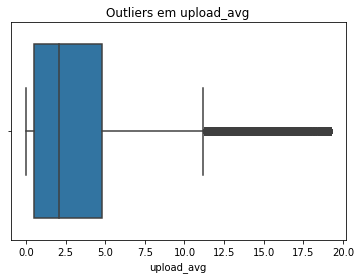

In [22]:
sns.boxplot(x = dados['upload_avg']).set_title("Outliers em upload_avg");

**Observando possíveis outliers na variável 'bill_avg'**

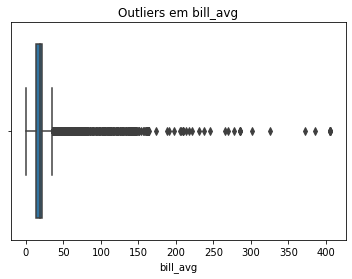

In [23]:
sns.boxplot(x = dados['bill_avg']).set_title("Outliers em bill_avg");

In [24]:
top_bill_avg = dados['bill_avg'].quantile(0.975)
top_bill_avg

42.0

Aqui pode-se confirmar a presença de diversos outliers, para solucionar essa problemática primeiro vai ser pego o maior valor corresponde a 97,5% dos dados, dessa forma iremos excluir os 2,5% de dados restantes.

In [25]:
dados.loc[dados['bill_avg'] > top_bill_avg, 'bill_avg'] = top_bill_avg

Agora que o maior valor correspondente a 97,5% dos dados está armazenado na variável 'top_bill_avg' o próximo passo é fazer o tratamento propriamente dito.

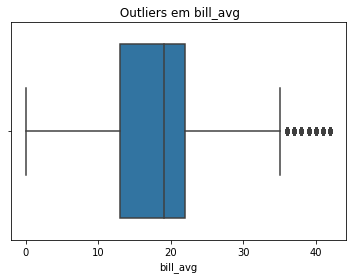

In [26]:
sns.boxplot(x = dados['bill_avg']).set_title(" Outliers em bill_avg");

Se algum valor na variável download_avg, for maior que a variavel top_download_avg esse valor vai ser substituído pelo valor da variável.

**Podemos observar uma redução considerável nos outliers.**

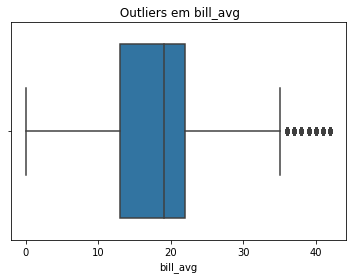

In [27]:
sns.boxplot(x = dados['bill_avg']).set_title(" Outliers em bill_avg");

## **D. Escala das Variáveis**

 **Processamento das variáveis categóricas:**

Como nesse dataset as variáveis, já estão convertidas e atribuídas com seus respectivos números inteiros, não tem muito o que se fazer.

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis 

In [28]:
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Padronização
dados[['subscription_age', 'bill_avg', 'reamining_contract','service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit']] = sc.fit_transform(dados[['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']])

In [29]:
dados.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,4.668335,0.760138,-0.988614,-0.335818,-0.748639,-0.290779,-0.208213,0
1,18,0,0,2.835389,-2.054734,0.004759,-0.335818,-0.940454,-0.824926,-0.208213,1
2,23,1,0,3.174460,-0.253216,-1.228393,-0.335818,-0.627613,-0.615912,-0.208213,1
3,27,0,0,2.171991,0.309758,0.004759,0.888749,-0.940454,-0.824926,-0.208213,1
4,34,0,0,1.936116,-2.054734,0.004759,-0.335818,-0.940454,-0.824926,-0.208213,1


# **5. Modelos de Machine Learning**

Com a etapa e pré-processamento concluída, o próximo passo é a modelagem.

**Objetivos:**

* Definir quais os modelos serão utilizados;
* Selecionar o melhor modelo;
* Avaliar os modelos;

**Importando os modelos que serão usados**

In [30]:
# Importações dos modelos que serão utilizados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

**Fazendo as demais importções**



In [39]:
# Biblioteca algebra linear
import numpy as np 

# Importando metricas de validação
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Biblioteca para observação de métricas
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

# Tunagem de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Criando a validação
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

**Iniciando a escolha do melhor modelo**

Etapas:

* Separar os dados em variável preditora e a variável resposta;
* Definir uma lista de medidas;
* Criar uma lista de modelos;
* Renomear a lista de modelos;
* Criar um laço de repetição para exibir os modelos que estão sendo executados, aplicar uma validação cruzada para cada modelo presente na lista de modelos, tendo como argumento para o 'cv' a validação criada acima e o 'scoring', vai receber a lista de medidas que foi criado e por último exibir as métricas para seus respectivos modelos;

In [ ]:
# Separando os dados em X e Y

# Variaveis preditoras
X = dados.drop(['churn', 'id'], axis = 1)

# Variavel resposta
y = dados['churn']

In [ ]:
# Criando uma lista com as medidas que serão analisadas
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

# Lista com o nome das medidas
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

# Criando uma lista com modelos selecionados
lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7)]

# Criando uma lista com os nomes dos modelos
nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 150, prof = 5)', 
                        'Random Forest (arvs = 150, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 150, prof = 5)
Rodando modelo: Random Forest (arvs = 150, prof = 7)


*Agora que todos os modelos da lista foram testados hora de observar o melhor modelo com base no F1-Score*

In [ ]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Bagging,0.937315,0.931710,0.954098,0.937996,0.942765
Árvore (prof = 7),0.937018,0.934295,0.951197,0.937348,0.942663
Árvore (prof = 5),0.935371,0.934744,0.947907,0.935447,0.941278
"Random Forest (arvs = 150, prof = 7)",0.926869,0.925793,0.941290,0.926999,0.933466
"Random Forest (arvs = 100, prof = 7)",0.926786,0.925755,0.941178,0.926911,0.933386
"Random Forest (arvs = 50, prof = 7)",0.926855,0.924831,0.942113,0.927101,0.933381
Árvore (prof = 3),0.924696,0.915019,0.947306,0.925871,0.930876
"Random Forest (arvs = 50, prof = 5)",0.908563,0.908265,0.925368,0.908600,0.916704
"Random Forest (arvs = 150, prof = 5)",0.906778,0.905169,0.925013,0.906974,0.914966
"Random Forest (arvs = 100, prof = 5)",0.906675,0.905655,0.924410,0.906798,0.914922


**Considerando a vital importância das métricas para avaliação dos modelos, vou utilizar uma função para exibir as métricas dos modelos criados em comparação com dados ainda não visto pelos modelos.**

In [31]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("acurácia: {:.5f}".format(accuracy_score(real, preditos)))
    print("precisão: {:.5f}".format(precision_score(real, preditos)))
    print("sensibilidade: {:.5f}".format(recall_score(real, preditos)))
    print("f1-score: {:.5f}".format(f1_score(real, preditos)))

**A curva ROC vai ser uma das métricas que será utilizada para avaliação do modelo, sendo assim uma função para a exibição da curva também vai ser criada.**

In [32]:
# Criando função para exibir a curva ROC
def plot_curva_roc(x, y):
    plt.plot(x, y, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

*Importando biblioteca para separação de dados*

In [35]:
# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

**Com os dados já separados entre treino e teste, agora sera feita a criação, treinamento e avaliação dos modelos**

 Criando o modelo que apresentou a melhor desempenho.

In [36]:
# Criando o modelo
modelo_bg = BaggingClassifier()

# Treinando o modelo
modelo_bg.fit(X_treino, y_treino)

BaggingClassifier()

In [37]:
# Fazendo as previsões
pred = modelo_bg.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0      1    All
Real                       
0        9088    566   9654
1         828  11201  12029
All      9916  11767  21683


In [62]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, pred.round())

acurácia: 0.93571
precisão: 0.95190
sensibilidade: 0.93117
f1-score: 0.94142


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

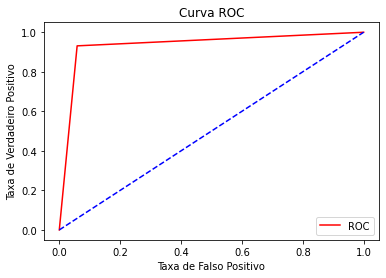

In [65]:
# Fazendo as comparações e exibindo o gráfico da curva
x, y, thresholds = roc_curve(y_teste, pred)
plot_curva_roc(x, y)

*O Bagging teve poucos valores categorizados como falsos positivos e falsos negativos, o que torna ele um modelo com uma alta taxa de assertividade.*

 Criando o segundo modelo com melhor desempenho.

In [59]:
# Criando o modelo
modelo_ar = DecisionTreeClassifier(max_depth = 7)

# Treinando o modelo
modelo_ar.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=7)

In [60]:
# Fazendo as previsões
pred2 = modelo_ar.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,pred2, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0      1    All
Real                       
0        9073    581   9654
1         794  11235  12029
All      9867  11816  21683


In [61]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, pred2.round())

acurácia: 0.93659
precisão: 0.95083
sensibilidade: 0.93399
f1-score: 0.94234


**Aqui podemos concluir que ambos os modelos tem desempenho bastante semelhantes, No entanto esse segundo modelo foi um pouco superior ao primeiro então ele que sera utilizado como modelo final.**

*Utilizando a Curva ROC para avaliar o desempenho do modelo*

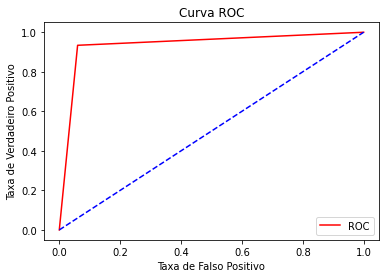

In [63]:
# Fazendo as comparações e exibindo o gráfico da curva
x, y, thresholds = roc_curve(y_teste, pred2)
plot_curva_roc(x, y)

In [64]:
#Analisando a importância de cada variável
modelo_ar.feature_importances_

feature_importances = pd.DataFrame(modelo_ar.feature_importances_, index = X_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
reamining_contract,0.887735
download_avg,0.083786
subscription_age,0.016386
bill_avg,0.011081
is_tv_subscriber,0.000537
upload_avg,0.000259
service_failure_count,0.000200
is_movie_package_subscriber,0.000017
download_over_limit,0.000000


*É possível enfatizar que a variável com maior importância é o tempo restante de contrato 'reamining_contract'.*

**Probabilidade de churn**

*Atribuindo a possibilidade de evasão de cada cliente.*

In [67]:
# Atribuindo a probabilidade de churn para cada cliente presente na base de dados
dados['Proba'] = modelo_ar.predict_proba(X[X_treino.columns])[:,1]

# Deixando apenas o ID do cliente e sua respectiva propensão de cancelamento
dados[['id','Proba']]

,id,Proba
0,15,0.027211
1,18,0.991870
2,23,1.000000
3,27,0.991870
4,34,0.991870
...,...,...
72269,1689648,1.000000
72270,1689676,0.141732
72271,1689679,0.000000
72272,1689733,0.999228


*Criando um novo DataFrame que vai receber apenas a variável ID e a variável Proba, porém vai estar em ordem decrescente com base na variável Proba que é a variável que vai indicar se a chance da variável ser ou não uma fraude.*

In [68]:
# Criando um novo DF ordenado em ordem decrescente 
df_ordenado = dados[['id','Proba']].sort_values(by='Proba', ascending = False)
df_ordenado

,id,Proba
72273,1689744,1.0
8600,199986,1.0
23295,547121,1.0
23292,547047,1.0
23289,546944,1.0
...,...,...
69885,1634663,0.0
71320,1667992,0.0
71812,1679730,0.0
71800,1679519,0.0


Criando um top 50 dos clientes com maior propensão a cancelar o nosso serviço.

In [69]:
# Exibindo os 50 clientes com maiores chances de churn
df_ordenado.head(50)

,id,Proba
72273,1689744,1.0
8600,199986,1.0
23295,547121,1.0
23292,547047,1.0
23289,546944,1.0
8594,199864,1.0
23286,546858,1.0
8596,199887,1.0
8598,199917,1.0
8599,199984,1.0


**Conclusão**

* Tanto a DecisionTree (Árvore de decisão) quando o BaggingClassifier apresentaram desempenhos bem semelhantes porém a DecisionTree foi um pouco melhor.
* A variável mais importantes é o tempo restante de contrato 'reamining_contract'

* Agora que já se sabe os motivos e as chances de cada cliente cancelar o serviço,temos tempo para tomar medidas preventivas, de modo a evitar essas saídas.